# Introduction

Home loan prediction is a smart technology that uses data to quickly decide if someone can get a loan to build a home. 

The home loan approval status analysis is a data-driven exploration aimed at understanding the factors influencing the approval or denial of loan applications. The availability of vast amounts of data in the financial industry has made it possible to utilize advanced analytics and machine learning techniques to gain valuable insights into the loan approval process.

The dataset used in this analysis includes various attributes related to  home loan applicants, such as their income, credit score, Education, employment status, loan amount, Property Area, and other relevant financial indicators. Additionally, the dataset contains a binary target variable indicating whether a home loan application was approved (1) or denied (0).

The primary objective of this analysis is to uncover patterns and relationships between different applicant characteristics and loan approval outcomes. By doing so, we can develop a predictive model that accurately estimates the likelihood of home  loan approval for future applicants based on their financial profiles.



# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Read the dataset

In [4]:
df=pd.read_csv("./loan_sanction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
print(df.shape)

(614, 13)


In [6]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
column_dtypes = df.dtypes
column_dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- Dataset has 614 rows and 13 columns.
- All values are not  non-null. 
- Data type of most of the columns is object.
- ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term and Credit_History are in int64 and float64.

In [9]:
#To print the categorical columns in the homeloan dataset
#To print the numeric type columns in the Laptop dataset
categorical = [var for var in df if df[var].dtype == 'object']
numerical = [var for var in df if df[var].dtype != 'object']

print(f'categorical variable are {categorical} \n numerical variable are {numerical}')

categorical variable are ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
 numerical variable are ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [10]:
#To print the numeric type columns in the home loan dataset 
numeric_columns=[var for var in df if df[var].dtype != 'object']
print("No. of Numeric Columns : ",len(numeric_columns))

No. of Numeric Columns :  5


In [11]:
#To print the categorical columns in the home loan dataset 
category_columns=[var for var in df if df[var].dtype == 'object']
print("No. of Category Columns : ",len(category_columns))

No. of Category Columns :  8


In [12]:
categorical

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

**check the number of distinct value in dataset of Education column**

In [13]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

**check the number of distinct value in dataset of Education,Married, Self_Employed and Gender column**

In [14]:
cate = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']

In [15]:
import pandas as pd
for column_name in cate:
    unique_values = df[column_name].unique()
    print(f"Column '{column_name}' has unique values: {unique_values}")

Column 'Gender' has unique values: ['Male' 'Female' nan]
Column 'Married' has unique values: ['No' 'Yes' nan]
Column 'Education' has unique values: ['Graduate' 'Not Graduate']
Column 'Self_Employed' has unique values: ['No' 'Yes' nan]
Column 'Property_Area' has unique values: ['Urban' 'Rural' 'Semiurban']


In [16]:
numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

**find the null values in categorical columns**

In [17]:
print(df[categorical].isnull().sum())

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64


**find the null values in numerical columns**

In [18]:
print(df[numerical].isnull().sum())

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64


**'Gender', 'Dependents', and 'Self_Employed' variables have missing values. I can not interprate them, as that would be giving the model wrong information. I'll just drop the rows with missing values**

In [19]:
df.dropna(subset= categorical, inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
print(df[numerical].isnull().sum())

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       43
dtype: int64


In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df['Loan_Amount_Term'].mode()[0]

360.0

In [23]:
df['Loan_Amount_Term'].median()

360.0

**replace the missing values of numerical features by median value**

In [24]:
#give the missing values of numerical features by median value
for var in numerical:     
    df[var].fillna(df[var].median(), inplace=True)

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**check the identical row in the dataset exist or not**

In [26]:
df.duplicated().sum()

0

In [27]:
print(df[numerical].isnull().sum())

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [28]:
cate = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']

In [29]:
import pandas as pd

for column_name in cate:
    unique_values = df[column_name].unique()
    print(f"Column '{column_name}' has unique values: {unique_values}")

Column 'Gender' has unique values: ['Male' 'Female']
Column 'Married' has unique values: ['No' 'Yes']
Column 'Education' has unique values: ['Graduate' 'Not Graduate']
Column 'Self_Employed' has unique values: ['No' 'Yes']
Column 'Property_Area' has unique values: ['Urban' 'Rural' 'Semiurban']


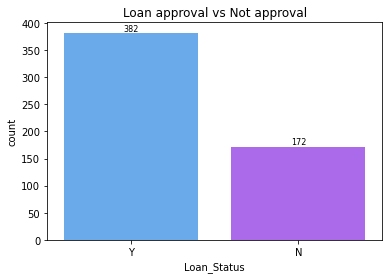

In [30]:
# Visualize the target variable over train data
ax = sns.countplot(x='Loan_Status', data=df,palette='cool')
plt.title("Loan approval vs Not approval")
# Display count on top of each bar
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2.0, count), ha='center', va='bottom', fontsize=8) 
plt.show()

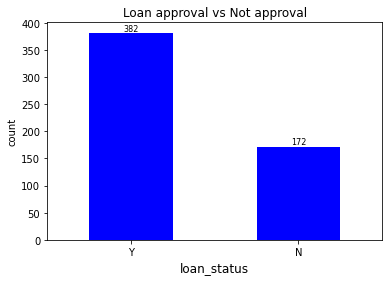

In [31]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df and a column named 'Loan_Status'
ax = df['Loan_Status'].value_counts().plot.bar(color='blue')
plt.title("Loan approval vs Not approval")
plt.xlabel("loan_status", fontsize=12)
plt.ylabel('count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# Display count on top of each bar
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2.0, count), ha='center', va='bottom', fontsize=8) 
plt.show()


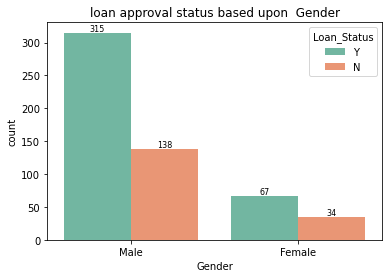

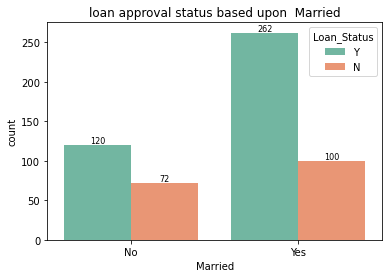

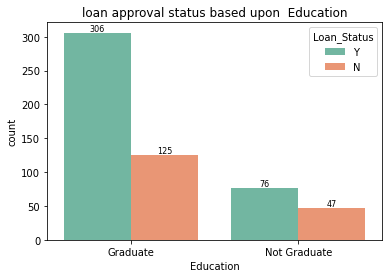

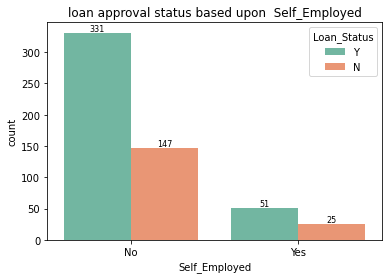

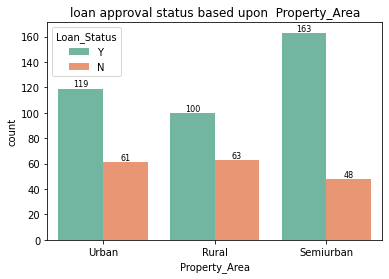

In [32]:
# Explore the relationship between categorical features and loan approval
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']
for feature in categorical_features:
    ax = sns.countplot(x=feature, hue='Loan_Status', data=df,palette='Set2')
    plt.title("loan approval status based upon  {}".format(feature))
    # Display count labels on top of each bar
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2.0, count), ha='center', va='bottom', fontsize=8) 
    #plt.savefig('home_loan_{}.png'.format(feature))    
    plt.show()

# Distribution of Numerical Variable
In this section, I will show the distribution of numerical variable using histogram 

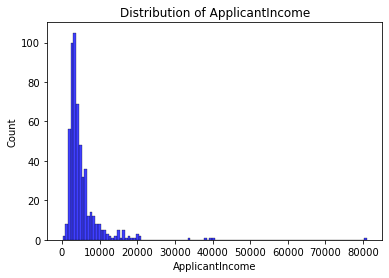

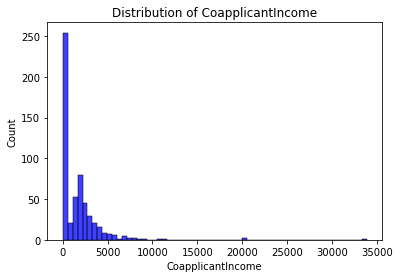

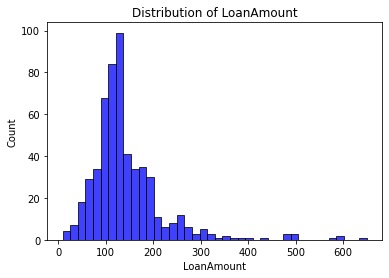

In [33]:
# 
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for feature in numerical_features:
    sns.histplot(x=feature, data=df,color='blue')
    plt.title("Distribution of {}".format(feature))
    #plt.savefig('home_loan_{}.hist.png'.format(feature)) 
    plt.show()

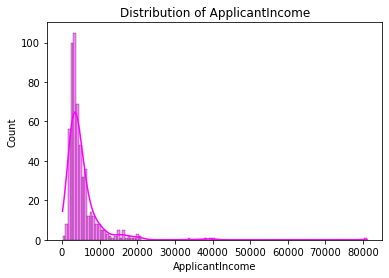

In [34]:
sns.histplot(data=df, x="ApplicantIncome", kde=True,color='magenta')
plt.title("Distribution of ApplicantIncome")
#plt.savefig('home_loan_ApplicantIncome.hist.png')
plt.show()

In [35]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [36]:
#Maximum ApplicantIncome of the dataset
max_Price=df['ApplicantIncome'].max()
print(max_Price)

81000


In [37]:
#Minimum ApplicantIncome of the dataset
min_Price=df['ApplicantIncome'].min()
print(min_Price)

150


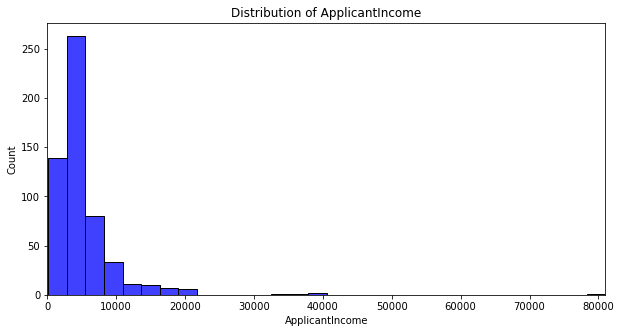

In [38]:
# Plotting the ApplicantIncome
plt.figure(figsize=(10, 5))
sns.histplot(df.ApplicantIncome, bins=30,color = 'blue')
plt.title("Distribution of ApplicantIncome")
max_price = df.ApplicantIncome.max()
plt.xlim(0, max_price)
# Save the picture
#plt.savefig('home_histogram.png')
plt.show()

In [39]:
#Maximum CoapplicantIncome of the dataset
max_Price=df['CoapplicantIncome'].max()
print(max_Price)

33837.0


In [40]:
#Minimum CoapplicantIncome of the dataset
min_Price=df['CoapplicantIncome'].min()
print(min_Price)

0.0


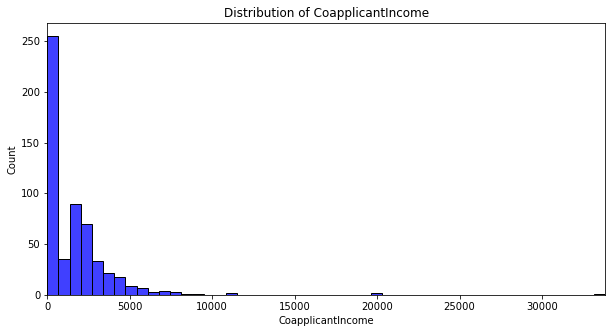

In [41]:
# Plotting the CoapplicantIncome
plt.figure(figsize=(10, 5))
sns.histplot(df.CoapplicantIncome, bins=50,color = 'blue')
plt.title("Distribution of CoapplicantIncome")
max_price = df.CoapplicantIncome.max()
plt.xlim(0, max_price)
# Save the picture
#plt.savefig('home_histogram.png')
plt.show()

In [42]:
train_df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


One thing about sklearn is that it needs input in terms of numbers only. ie; either as int datatype or as float datatype. This means sklearn doesn't take string as input. So to get rid of strings I need to create numeric features out of these categorical or string features. So I'll now use a concept called "Dummification" where I'll create dummies of variable.

In [43]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,127.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [44]:
train_df_encoded.shape

(554, 15)

The scikit learn algorithms take two separate arguments. This means they need independent variables separately & the dependent variable (or target variable) separately. But since in the train dataset both independent & dependent variables are present together so I need to separate them out.

Firstly, I'll create a set of independent variables from the train dataset. So I'm dropping the 'target' variable from it using axis=1. This axis=1 specifies that the drop shall happen from the column. I'll store this set in an object called "X" as follows and I need my separate target variable. So keeping only the 'target' variable in an object Y

In [45]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y',axis = 1)
Y = train_df_encoded['Loan_Status_Y']

# Splitting Data Set
The data set will be split into 80% train and 20% test.

This split function accepts an independent variable 'X' & a dependent variable 'Y', and then split them into two parts. First is independent variable for train and independent variable for test. And then dependent variable for train and dependent variable for test. I'm naming them as X_train,X_test,Y_train & Y_test sets respectively as follows:

In [46]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [47]:
X_train.shape

(443, 14)

In [48]:
X_test.shape

(111, 14)

In [49]:
Y_train.shape

(443,)

In [50]:
Y_test.shape

(111,)

In [51]:
Y_test_array = Y_test.to_numpy()
Y_test_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1], dtype=uint8)

#  Logistic Regression

In [52]:
# define the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
model.fit(X_train, Y_train)

# predict for X_test
Y_test_pred = model.predict(X_test)

Y_test_pred 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1], dtype=uint8)

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_test_pred))
print('-'*30)
print(confusion_matrix(Y_test,Y_test_pred ))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.81      0.99      0.89        80

    accuracy                           0.82       111
   macro avg       0.86      0.69      0.72       111
weighted avg       0.84      0.82      0.79       111

------------------------------
[[12 19]
 [ 1 79]]


In [54]:
from sklearn.metrics import accuracy_score
LRAc = accuracy_score(Y_test, Y_test_pred )
print('LR accuracy: {:.2f}%'.format(LRAc*100))

LR accuracy: 81.98%


In [55]:
#Calculate the number of correct predictions
correct = sum(p == a for p, a in zip(Y_test,Y_test_pred ))

# Calculate the total number of predictions
total = len(Y_test)

# Calculate the accuracy
accuracy = correct / total

# Print the accuracy
print('LR accuracy: {:.2f}%'.format(accuracy*100))

LR accuracy: 81.98%


#  Naive Bayes

In [56]:
from sklearn.naive_bayes import CategoricalNB

NB_clf = CategoricalNB()
NB_clf.fit(X_train, Y_train)

Y_test_pred = NB_clf.predict(X_test)

print(classification_report(Y_test, Y_test_pred))
print(confusion_matrix(Y_test, Y_test_pred))

from sklearn.metrics import accuracy_score
NBAc = accuracy_score(Y_test, Y_test_pred)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAc*100))


              precision    recall  f1-score   support

           0       0.83      0.32      0.47        31
           1       0.79      0.97      0.87        80

    accuracy                           0.79       111
   macro avg       0.81      0.65      0.67       111
weighted avg       0.80      0.79      0.76       111

[[10 21]
 [ 2 78]]
Categorical Naive Bayes accuracy: 79.28%


#  Support Vector Machine (SVM)

In [57]:
from sklearn.svm import SVC

SVC_clf = SVC(kernel='rbf', max_iter=100)
SVC_clf.fit(X_train, Y_train)

Y_test_pred = SVC_clf.predict(X_test)

print(classification_report(Y_test, Y_test_pred))
print(confusion_matrix(Y_test, Y_test_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(Y_test, Y_test_pred)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.45      0.16      0.24        31
           1       0.74      0.93      0.82        80

    accuracy                           0.71       111
   macro avg       0.60      0.54      0.53       111
weighted avg       0.66      0.71      0.66       111

[[ 5 26]
 [ 6 74]]
SVC accuracy: 71.17%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#  Model Comparison 

In [58]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Categorical Naive Bayes','SVM'], 
                        'Accuracy': [LRAc*100,NBAc *100, SVCAcc *100]})
sorted_compare = compare.sort_values(by='Accuracy', ascending=False)
sorted_compare

,Model,Accuracy
0,Logistic Regression,81.981982
1,Categorical Naive Bayes,79.279279
2,SVM,71.171171


In [59]:
# Get the maximum accuracy value and corresponding model
max_accuracy = sorted_compare.iloc[0]["Accuracy"]
model = sorted_compare.iloc[0]["Model"]
model

'Logistic Regression'

# Prediction over next data

In [60]:
df1=pd.read_csv("C:\\Users\\subha\\OneDrive\\Desktop\\ml project\\home_loan\\loan_sanction_test.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [61]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [62]:
df1.shape

(367, 12)

In [63]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [64]:
column_dtypes = df1.dtypes
column_dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [65]:
categorical = [var for var in df1 if df1[var].dtype == 'object']
numerical = [var for var in df1 if df1[var].dtype != 'object']

print(f'categorical variable are {categorical} \n numerical variable are {numerical}')

categorical variable are ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] 
 numerical variable are ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [66]:
categorical

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [67]:
print(df1[categorical].isnull().sum())

Loan_ID           0
Gender           11
Married           0
Dependents       10
Education         0
Self_Employed    23
Property_Area     0
dtype: int64


**'Gender', 'Dependents', and 'Self_Employed' variables have missing values. I can not predicted those rows, as that would be giving the wrong information. I'll just drop the rows with missing values**

In [68]:
df1.dropna(subset= categorical, inplace=True)
df2 = df1
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [69]:
print(df2[numerical].isnull().sum())

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      6
Credit_History       26
dtype: int64


In [70]:
#give the missing values of numerical features by median value
for var in numerical:     
    df2[var].fillna(df2[var].median(), inplace=True)

In [71]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [72]:
print(df2[numerical].isnull().sum())

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [73]:
df3 = df2.drop(columns=['Loan_ID']) ## Dropping Loan ID
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [74]:
df3.shape

(324, 11)

In [75]:
#### Encoding categrical Features: ##########
df3_encoded = pd.get_dummies(df3,drop_first=True)
df3_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,3250,1993,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


# model fit over new data

In [76]:
# define the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
model.fit(X_train, Y_train)

# predict for new data
df3_pred = model.predict(df3_encoded)

df3_pred 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [77]:
import numpy as np

result = np.where(df3_pred  == 1, "Yes", "No")

print(result)

['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'

In [78]:
df2['loan_approval'] = result
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_approval
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Yes
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Yes
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Yes
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,Yes
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Yes


In [79]:
df1_result = df2[['Loan_ID','loan_approval']]
df1_result

,Loan_ID,loan_approval
0,LP001015,Yes
1,LP001022,Yes
2,LP001031,Yes
3,LP001035,Yes
4,LP001051,Yes
...,...,...
362,LP002971,Yes
363,LP002975,Yes
364,LP002980,Yes
365,LP002986,Yes


In [80]:
df1=pd.read_csv("C:\\Users\\subha\\OneDrive\\Desktop\\ml project\\home_loan\\loan_sanction_test.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [81]:
# Merge the two dataframes based on the common column
df1_final_result = pd.merge(df1, df1_result, on='Loan_ID', how='left')
df1_final_result 
# Fill the NaN values in the dataframe with 'Pending'
df1_final_result ['loan_approval'].fillna('Pending', inplace=True)
df1_final_result 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_approval
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Yes
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Yes
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Yes
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Yes
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Yes


**Thank you**